# Datasets to download
Here we list a few datasets that might be interesting to explore with vaex.

## New York taxi dataset

The very well known dataset containing trip infromation from the iconic Yellow Taxi company in NYC. 
The raw data is curated by the [Taxi & Limousine Commission (TLC)](
https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page
).

See for instance [Analyzing 1.1 Billion NYC Taxi and Uber Trips, with a Vengeance](http://toddwschneider.com/posts/analyzing-1-1-billion-nyc-taxi-and-uber-trips-with-a-vengeance/) for some ideas.

 * [Year: 2015 - 146 million rows - 12GB](
https://vaex.s3.us-east-2.amazonaws.com/taxi/yellow_taxi_2015_f32s.hdf5
)
 * [Year 2009-2015 - 1 billion rows - 107GB](
https://vaex.s3.us-east-2.amazonaws.com/taxi/yellow_taxi_2009_2015_f32.hdf5
)

One can also stream the data directly from S3. Only the data that is necessary will be streamed, and it will cached locally:
```
import vaex
df = vaex.open('s3://vaex/taxi/yellow_taxi_2015_f32s.hdf5?anon=true')
```

number of rows: 1,173,057,927
number of columns: 18


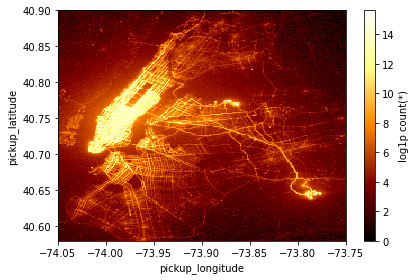

In [1]:
import vaex
import warnings; warnings.filterwarnings("ignore")

df = vaex.open('/data/yellow_taxi_2009_2015_f32.hdf5')

print(f'number of rows: {df.shape[0]:,}')
print(f'number of columns: {df.shape[1]}')

long_min = -74.05
long_max = -73.75
lat_min = 40.58
lat_max = 40.90

df.plot(df.pickup_longitude, df.pickup_latitude, f="log1p", limits=[[-74.05, -73.75], [40.58, 40.90]], show=True);

## Gaia - European Space Agency 

Gaia is an ambitious mission to chart a three-dimensional map of our Galaxy, the Milky Way, in the process revealing the composition, formation and evolution of the Galaxy.

See the [Gaia Science Homepage for details](http://www.cosmos.esa.int/web/gaia/home), and you may want to try the [Gaia Archive](https://archives.esac.esa.int/gaia) for ADQL (SQL like) queries.

number of rows: 1,692,919,135
number of columns: 94


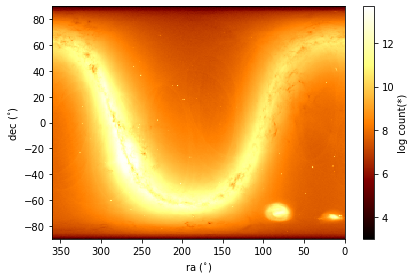

In [2]:
df = vaex.open('/data/gaia-dr2-sort-by-source_id.hdf5')

print(f'number of rows: {df.shape[0]:,}')
print(f'number of columns: {df.shape[1]}')

df.plot("ra", "dec", f="log", limits=[[360, 0], [-90, 90]], show=True);

## U.S. Airline Dataset

This dataset contains information on flights within the United States between 1988 and 2018. 
The original data can be downloaded from [United States Department of Transportation](
https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236
).

- [Year 1988-2018 - 180 million rows - 17GB](
https://vaex.s3.us-east-2.amazonaws.com/airline/us_airline_data_1988_2018.hdf5
)

One can also stream it from S3:
```
import vaex
df = vaex.open('s3://vaex/airline/us_airline_data_1988_2018.hdf5?anon=true')
```

In [3]:
df = vaex.open('/data/airline/us_airline_data_1988_2018.hd5')

print(f'number of rows: {df.shape[0]:,}')
print(f'number of columns: {df.shape[1]}')

df.head(5)

number of rows: 183,821,926
number of columns: 29


#,Year,Month,DayOfMonth,DayOfWeek,UniqueCarrier,TailNum,FlightNum,Origin,Dest,CRSDepTime,DepTime,DepDelay,TaxiOut,TaxiIn,CRSArrTime,ArrTime,ArrDelay,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1988,1,8,5,PI,None,930,BGM,ITH,1525,1532,7,--,--,1545,1555,10,0,None,0,20,23,--,32,--,--,--,--,--
1,1988,1,9,6,PI,None,930,BGM,ITH,1525,1522,-3,--,--,1545,1535,-10,0,None,0,20,13,--,32,--,--,--,--,--
2,1988,1,10,7,PI,None,930,BGM,ITH,1525,1522,-3,--,--,1545,1534,-11,0,None,0,20,12,--,32,--,--,--,--,--
3,1988,1,11,1,PI,None,930,BGM,ITH,1525,--,--,--,--,1545,--,--,1,None,0,20,--,--,32,--,--,--,--,--
4,1988,1,12,2,PI,None,930,BGM,ITH,1525,1524,-1,--,--,1545,1540,-5,0,None,0,20,16,--,32,--,--,--,--,--


## Sloan Digital Sky Survey (SDSS)


The data is public and can be queried from the [SDSS archive](https://www.sdss.org/).
The original query at [SDSS archive](https://www.sdss.org/) was (although split in small parts): 

```
SELECT ra, dec, g, r from PhotoObjAll WHERE type = 6 and  clean = 1 and r>=10.0 and r<23.5;
```

number of rows: 132,447,497
number of columns: 21


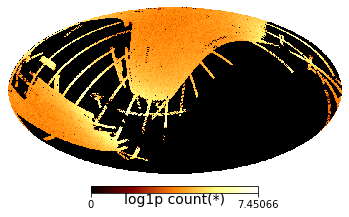

In [4]:
df = vaex.open('/data/sdss/sdss-clean-stars-dered.hdf5')

print(f'number of rows: {df.shape[0]:,}')
print(f'number of columns: {df.shape[1]}')

df.healpix_plot(df.healpix9, show=True, f="log1p", healpix_max_level=9, healpix_level=9,
                healpix_input='galactic', healpix_output='galactic', rotation=(0,45)
               )

## Helmi & de Zeeuw 2000
Result of an N-body simulation of the accretion of 33 satellite galaxies into a Milky Way dark matter halo.
 * [3 million rows - 252MB](
 https://github.com/vaexio/vaex-datasets/releases/download/v1.0/helmi-dezeeuw-2000-FeH-v2.hdf5
 )

number of rows: 3,300,000
number of columns: 11


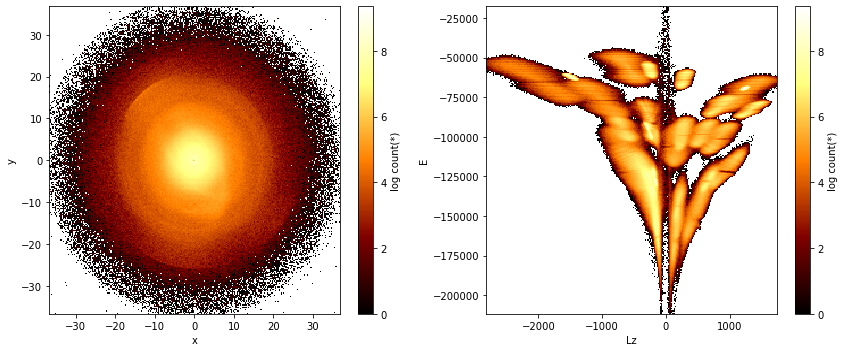

In [5]:
df = vaex.datasets.helmi_de_zeeuw.fetch() # this will download it on the fly

print(f'number of rows: {df.shape[0]:,}')
print(f'number of columns: {df.shape[1]}')

df.plot([["x", "y"], ["Lz", "E"]], f="log", figsize=(12,5), show=True, limits='99.99%');